<a href="https://colab.research.google.com/github/tantiboro/Deployment/blob/main/lead_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
!pip install feature_engine

In [282]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import plotly.express as px
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
import warnings
warnings.filterwarnings('ignore')

In [283]:
# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

# for feature engineering
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import RareLabelEncoder
from feature_engine.imputation import CategoricalImputer
from feature_engine.selection import DropFeatures
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

In [284]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
df = pd.read_csv('/content/drive/MyDrive/New Folder/dataset/Leads.csv')
print(df.shape)
df.head().T

(9240, 37)


,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


In [286]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [287]:
df.drop(columns=['prospect_id'], inplace=True)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_number                                    9240 non-null   int64  
 1   lead_origin                                    9240 non-null   object 
 2   lead_source                                    9204 non-null   object 
 3   do_not_email                                   9240 non-null   object 
 4   do_not_call                                    9240 non-null   object 
 5   converted                                      9240 non-null   int64  
 6   totalvisits                                    9103 non-null   float64
 7   total_time_spent_on_website                    9240 non-null   int64  
 8   page_views_per_visit                           9103 non-null   float64
 9   last_activity                                  9137 

In [289]:
categorical = list(df.select_dtypes(include='object').columns)
discrete = list(df.select_dtypes(exclude='object').columns)


In [290]:
categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'do_not_call',
 'last_activity',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'what_matters_most_to_you_in_choosing_a_course',
 'search',
 'magazine',
 'newspaper_article',
 'x_education_forums',
 'newspaper',
 'digital_advertisement',
 'through_recommendations',
 'receive_more_updates_about_our_courses',
 'tags',
 'lead_quality',
 'update_me_on_supply_chain_content',
 'get_updates_on_dm_content',
 'lead_profile',
 'city',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'i_agree_to_pay_the_amount_through_cheque',
 'a_free_copy_of_mastering_the_interview',
 'last_notable_activity']

In [291]:
discrete

['lead_number',
 'converted',
 'totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score']

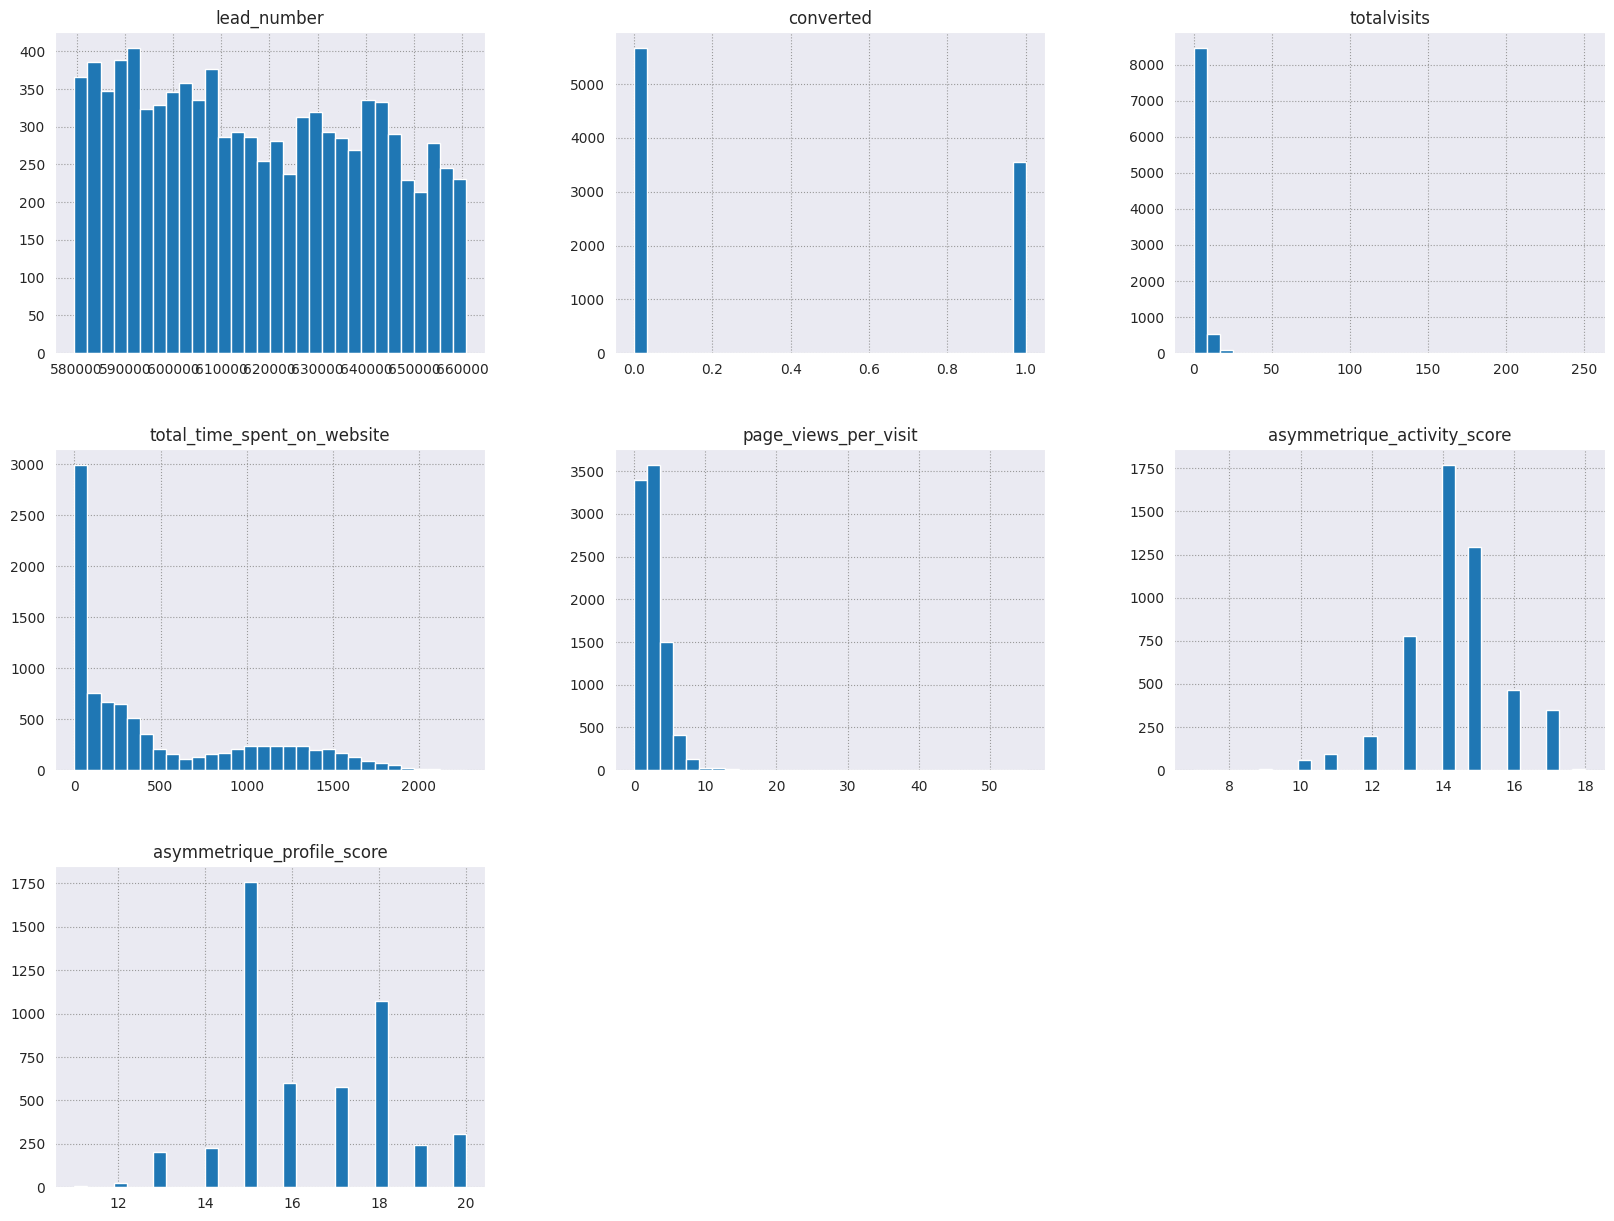

In [292]:
#histogram of discrete varialbles
df[discrete].hist(bins=30, figsize=(20,15))
plt.show()


<Figure size 1000x1000 with 0 Axes>

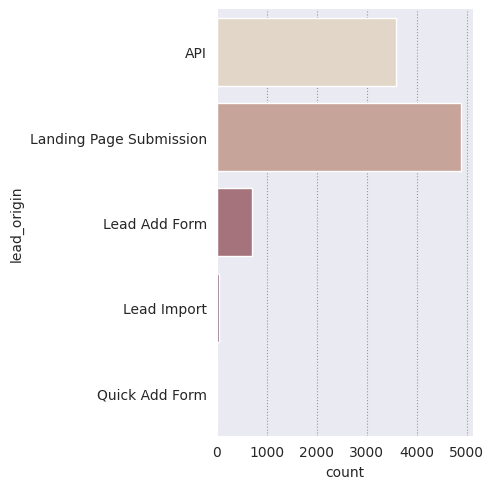

<Figure size 1000x1000 with 0 Axes>

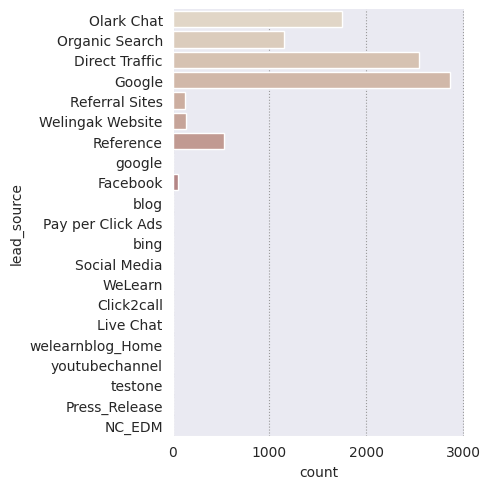

<Figure size 1000x1000 with 0 Axes>

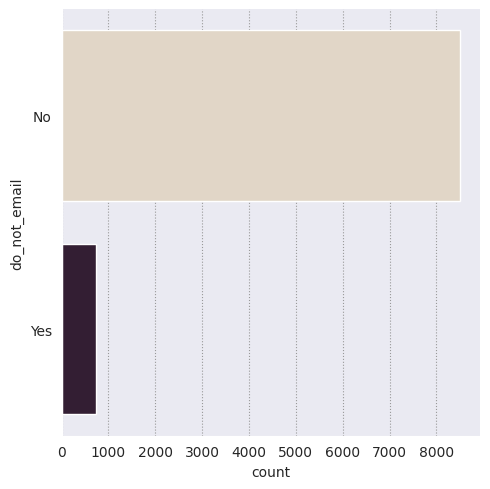

<Figure size 1000x1000 with 0 Axes>

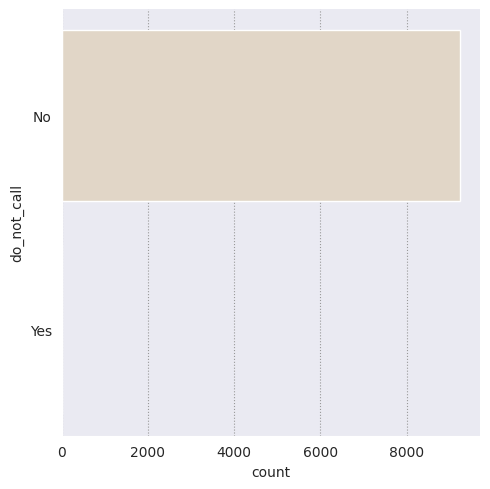

<Figure size 1000x1000 with 0 Axes>

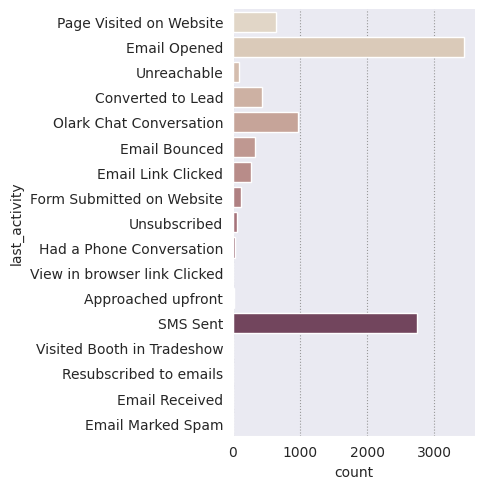

<Figure size 1000x1000 with 0 Axes>

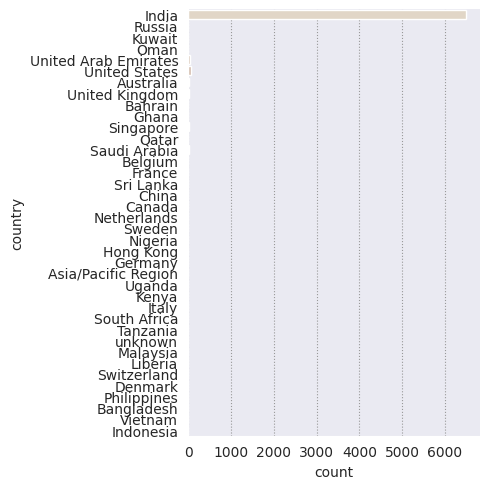

<Figure size 1000x1000 with 0 Axes>

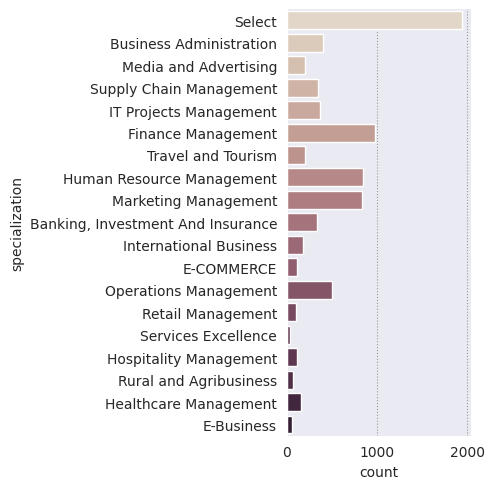

<Figure size 1000x1000 with 0 Axes>

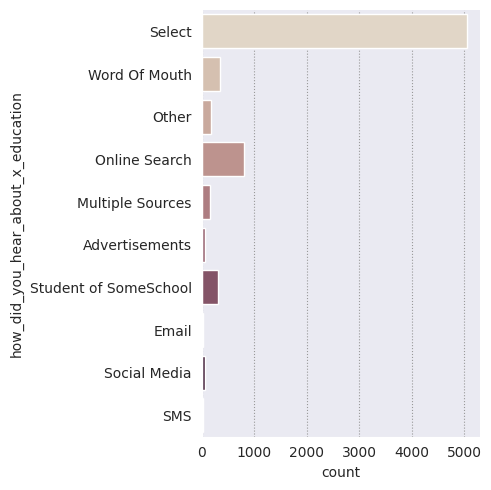

<Figure size 1000x1000 with 0 Axes>

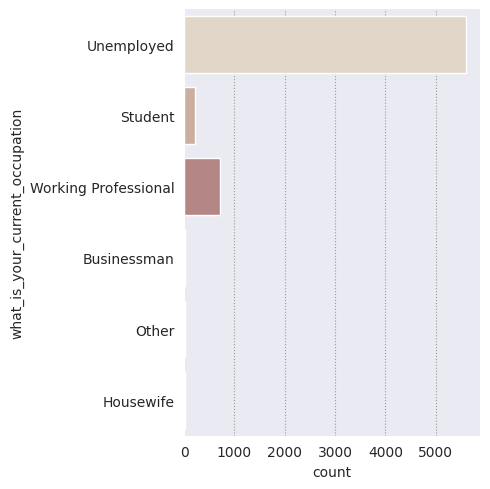

<Figure size 1000x1000 with 0 Axes>

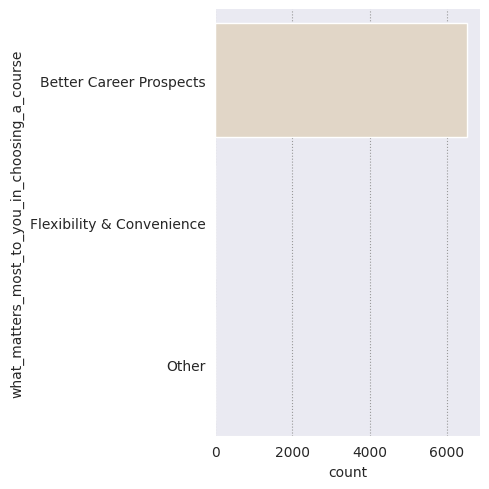

<Figure size 1000x1000 with 0 Axes>

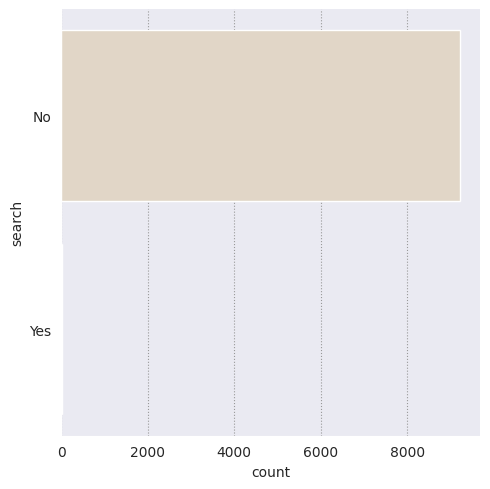

<Figure size 1000x1000 with 0 Axes>

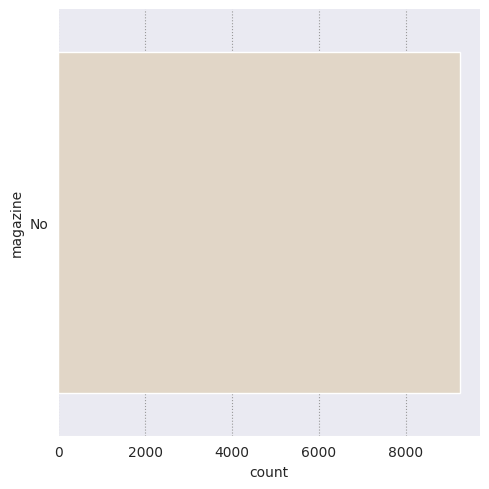

<Figure size 1000x1000 with 0 Axes>

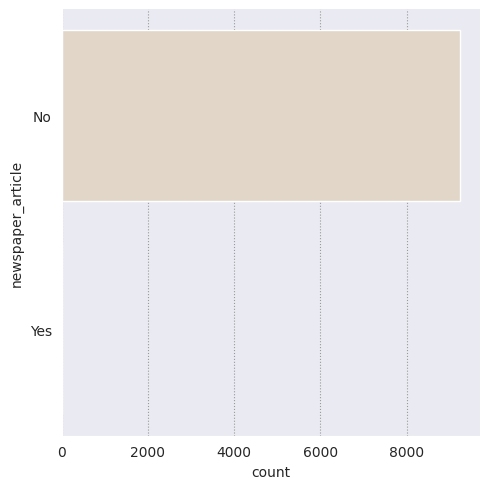

<Figure size 1000x1000 with 0 Axes>

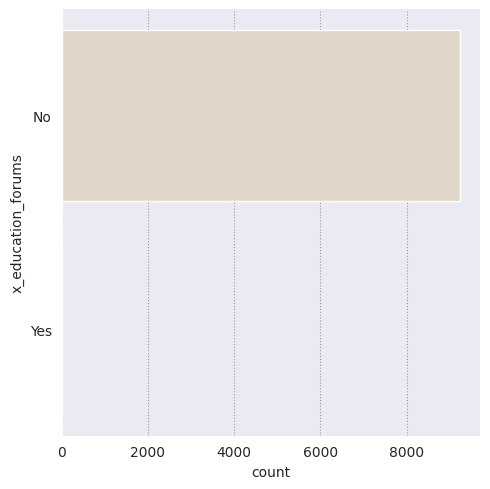

<Figure size 1000x1000 with 0 Axes>

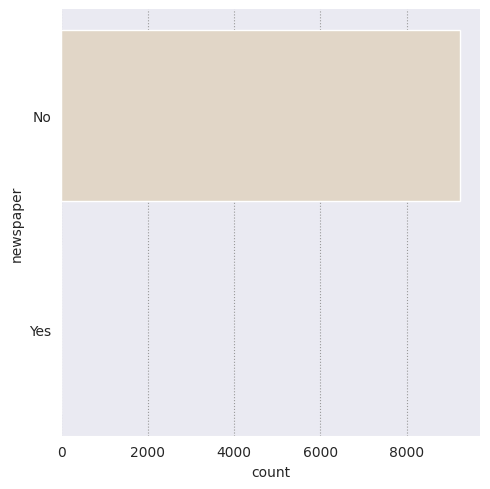

<Figure size 1000x1000 with 0 Axes>

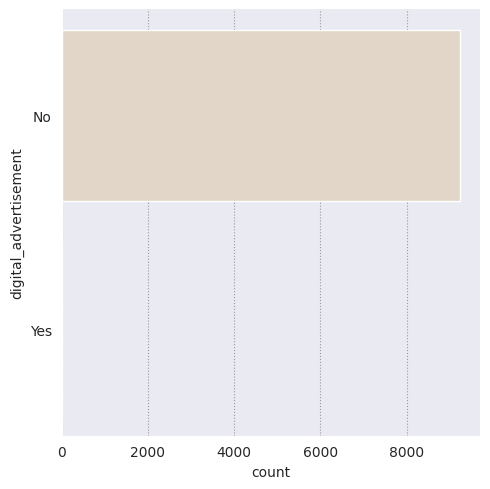

<Figure size 1000x1000 with 0 Axes>

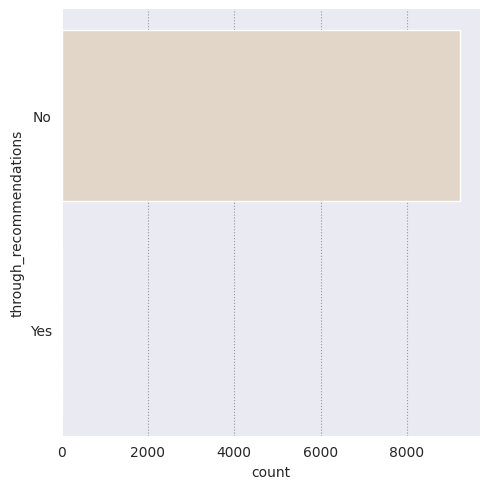

<Figure size 1000x1000 with 0 Axes>

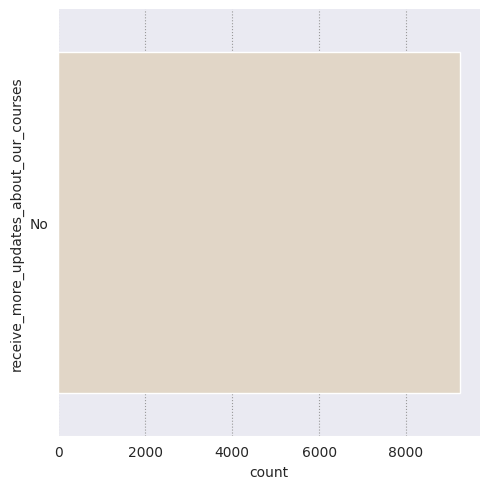

<Figure size 1000x1000 with 0 Axes>

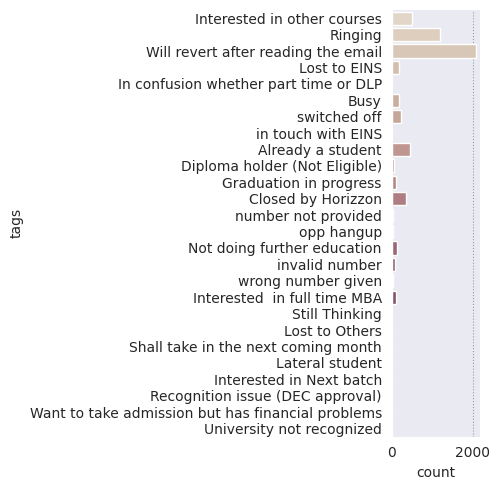

<Figure size 1000x1000 with 0 Axes>

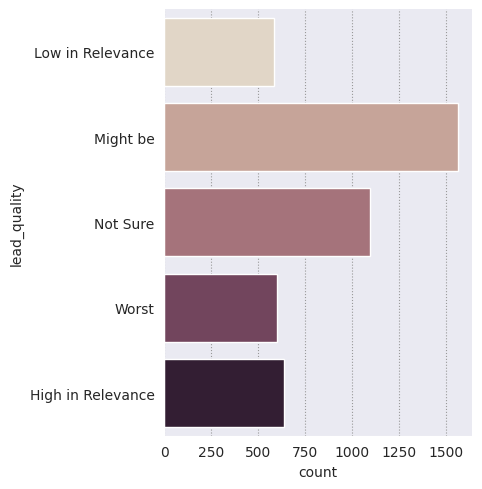

<Figure size 1000x1000 with 0 Axes>

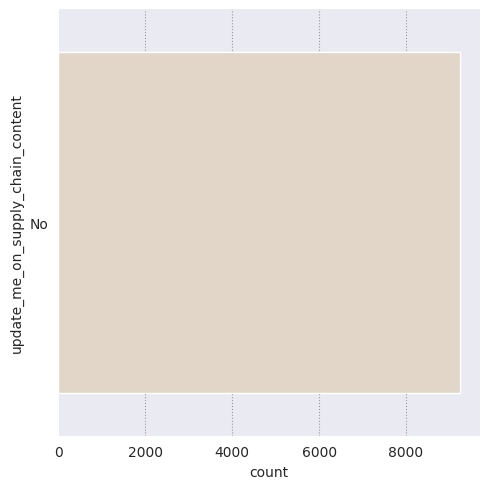

<Figure size 1000x1000 with 0 Axes>

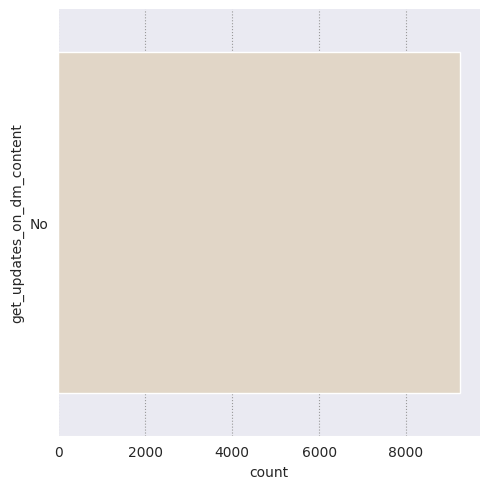

<Figure size 1000x1000 with 0 Axes>

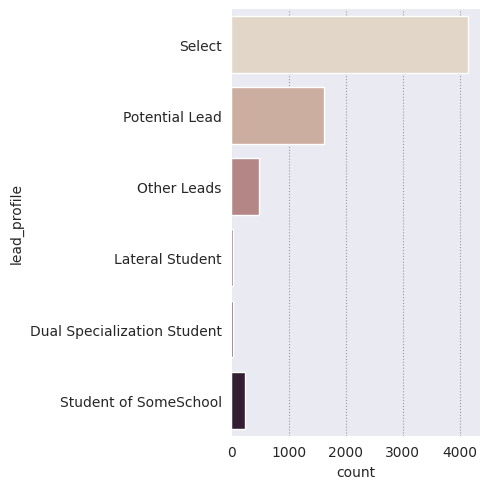

<Figure size 1000x1000 with 0 Axes>

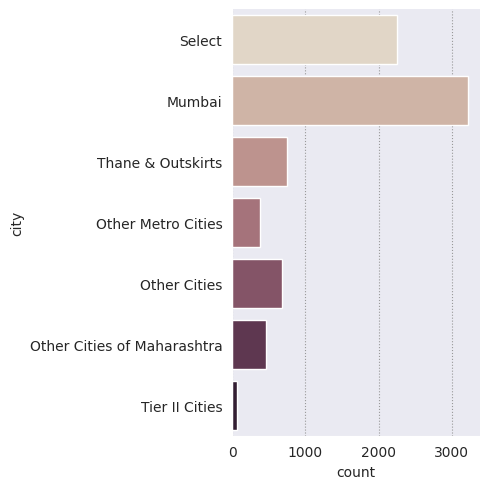

<Figure size 1000x1000 with 0 Axes>

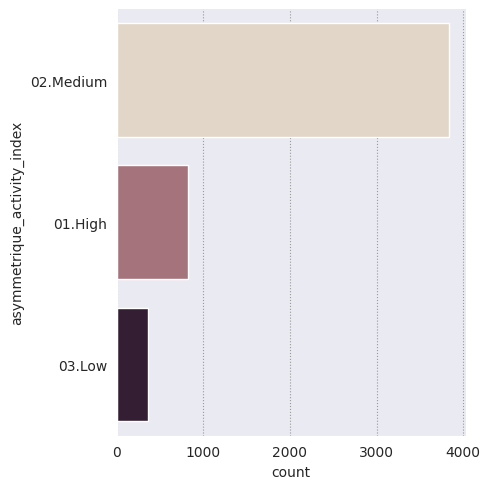

<Figure size 1000x1000 with 0 Axes>

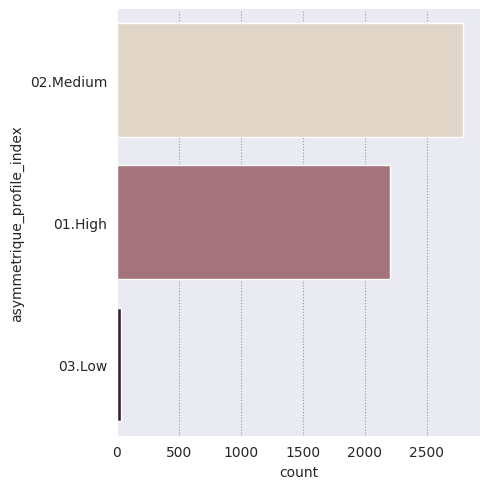

<Figure size 1000x1000 with 0 Axes>

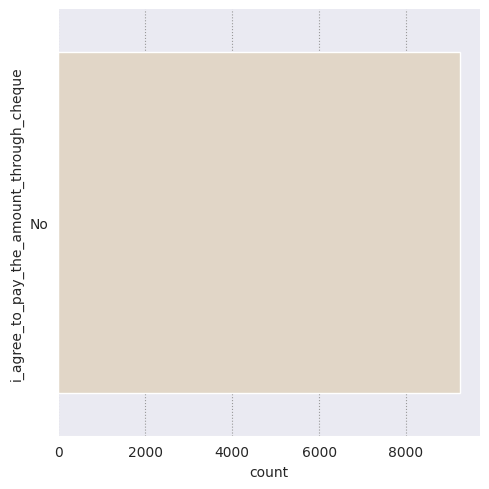

<Figure size 1000x1000 with 0 Axes>

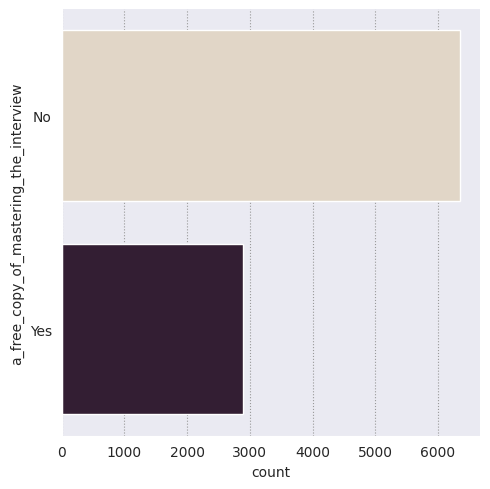

<Figure size 1000x1000 with 0 Axes>

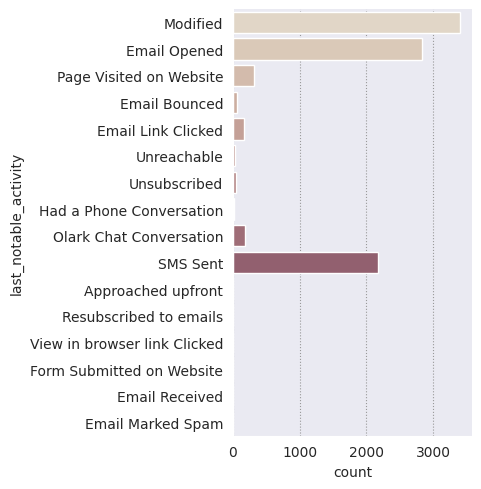

In [293]:
#plot of categorical
for var in categorical:
    plt.figure(figsize=(10, 10))
    sns.catplot(data=df, y=var, kind="count", palette="ch:.25")
    plt.show()


In [294]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
totalvisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
total_time_spent_on_website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
page_views_per_visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
asymmetrique_activity_score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
asymmetrique_profile_score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [295]:
df.shape

(9240, 36)

In [296]:
#df.columns = df.columns.str.lower().str.replace(' ', '_')

In [297]:
#convert select to nan
df = df.replace('select', np.nan)

In [298]:
df.isnull().sum()

lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums          

In [299]:
round(100*df.isnull().mean(), 2).sort_values(ascending=False)

lead_quality                                     51.59
asymmetrique_activity_index                      45.65
asymmetrique_profile_index                       45.65
asymmetrique_profile_score                       45.65
asymmetrique_activity_score                      45.65
tags                                             36.29
lead_profile                                     29.32
what_matters_most_to_you_in_choosing_a_course    29.32
what_is_your_current_occupation                  29.11
country                                          26.63
how_did_you_hear_about_x_education               23.89
specialization                                   15.56
city                                             15.37
page_views_per_visit                              1.48
totalvisits                                       1.48
last_activity                                     1.11
lead_source                                       0.39
i_agree_to_pay_the_amount_through_cheque          0.00
a_free_cop

In [300]:
# We will drop the columns having more than 70% nan values
#Dropping also the lead number and the prospect because they are only reference numbers
# df = df.loc[:, df.isnull().mean() < 0.70]
# df.drop(columns=['lead_number', 'prospect_id'], inplace=True)


In [301]:
# Lead Quality: Indicates the quality of the lead based on the data and intuition the employee who has been assigned to the lead

In [302]:
print(df.columns.to_list)

<bound method IndexOpsMixin.tolist of Index(['lead_number', 'lead_origin', 'lead_source', 'do_not_email',
       'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtyp

Now we will take care of null values in each column one by one

In [303]:
df['lead_quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: lead_quality, dtype: object

<Axes: >

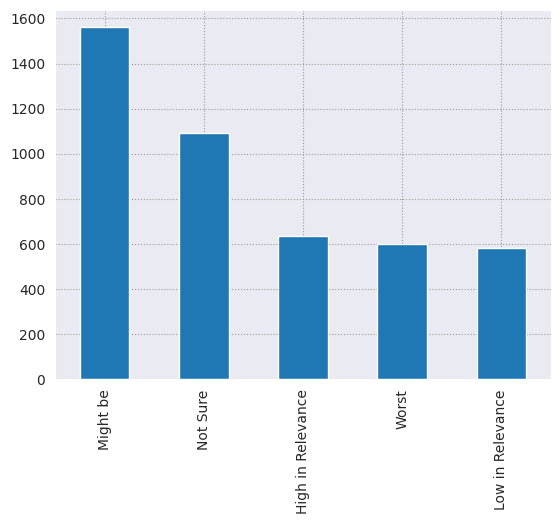

In [304]:
df['lead_quality'].value_counts().plot(kind='bar')

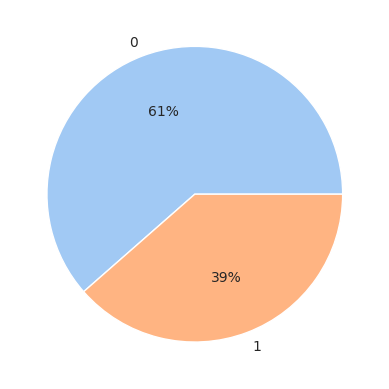

In [305]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['converted'].value_counts(), labels=df['converted'].value_counts().index, colors = colors, autopct='%.0f%%')

plt.show()

In [306]:
#As Lead quality is based on the intuition of the the employee, so if left blank, we can input not in NAN safely
#df.lead_quality = df.lead_quality.replace(np.nan, 'Not Sure')

In [307]:
#df['lead_quality'].value_counts().plot(kind='bar')

In [308]:
import random
def randomiseMissingData(df):
    "randomise missing data for DataFrame (within a column)"
    df = df.copy()
    for col in df.columns:
        data = df[col]
        mask = data.isnull()
        samples = random.choices( data[~mask].values , k = mask.sum() )
        data[mask] = samples

    return df

In [309]:
df = randomiseMissingData(df)

<Axes: >

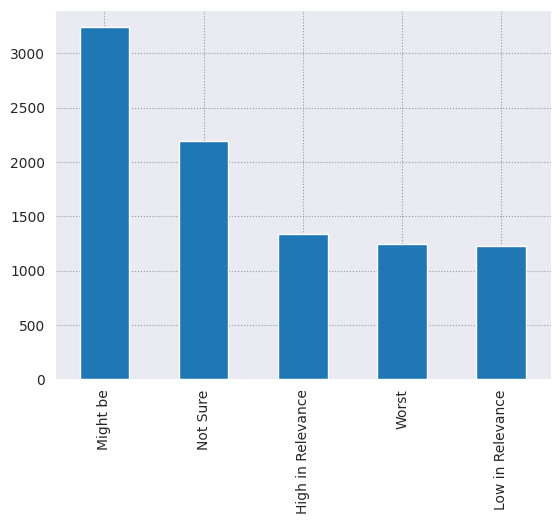

In [310]:
df['lead_quality'].value_counts().plot(kind='bar')

In [311]:
round(100*df.isnull().mean(), 2)

lead_number                                      0.0
lead_origin                                      0.0
lead_source                                      0.0
do_not_email                                     0.0
do_not_call                                      0.0
converted                                        0.0
totalvisits                                      0.0
total_time_spent_on_website                      0.0
page_views_per_visit                             0.0
last_activity                                    0.0
country                                          0.0
specialization                                   0.0
how_did_you_hear_about_x_education               0.0
what_is_your_current_occupation                  0.0
what_matters_most_to_you_in_choosing_a_course    0.0
search                                           0.0
magazine                                         0.0
newspaper_article                                0.0
x_education_forums                            

In [312]:
df.dtypes

lead_number                                      float64
lead_origin                                       object
lead_source                                       object
do_not_email                                      object
do_not_call                                       object
converted                                        float64
totalvisits                                      float64
total_time_spent_on_website                      float64
page_views_per_visit                             float64
last_activity                                     object
country                                           object
specialization                                    object
how_did_you_hear_about_x_education                object
what_is_your_current_occupation                   object
what_matters_most_to_you_in_choosing_a_course     object
search                                            object
magazine                                          object
newspaper_article              

In [313]:
A = df[['asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score']]

<Axes: >

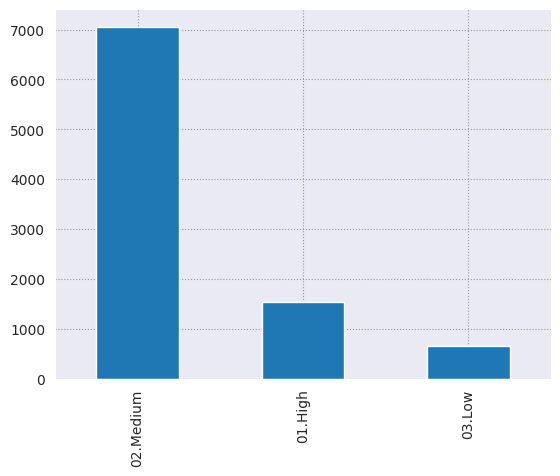

In [314]:
A.asymmetrique_activity_index.value_counts().plot(kind='bar')

<Axes: >

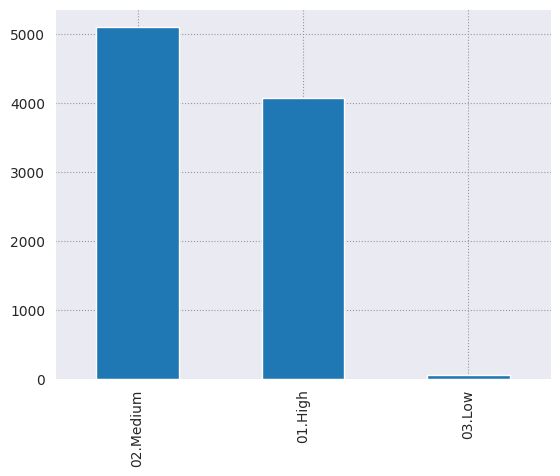

In [315]:
A.asymmetrique_profile_index.value_counts().plot(kind='bar')

<Axes: >

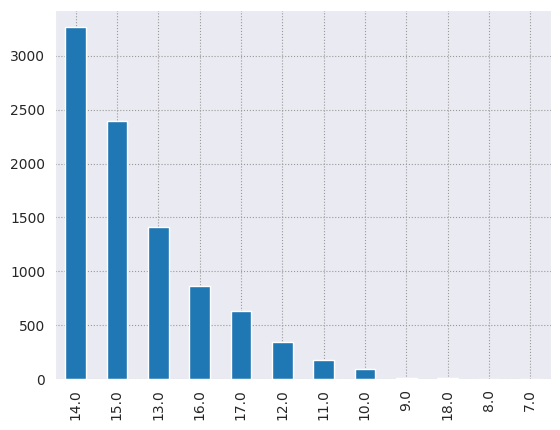

In [316]:
A.asymmetrique_activity_score.value_counts().plot(kind='bar')

<Axes: >

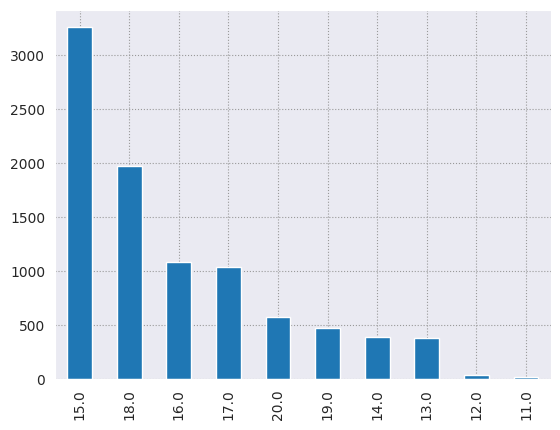

In [317]:
A.asymmetrique_profile_score.value_counts().plot(kind='bar')

In [318]:
# categorical = list(df.select_dtypes(include='object').columns)
# numerical = ['totalvisits','total_time_spent_on_website','page_views_per_visit','asymmetrique_activity_score','asymmetrique_profile_score']

In [319]:
#categorical

<Axes: >

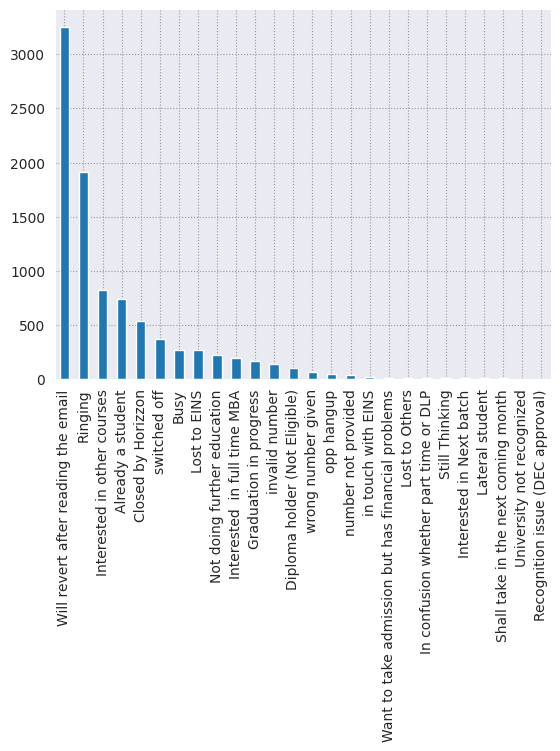

In [320]:
df.tags.value_counts().plot(kind='bar')


In [321]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.converted.values
y_val = df_val.converted.values

del df_train['converted']
del df_val['converted']

In [322]:
from sklearn.model_selection import train_test_split


In [323]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)


In [324]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.converted.values
y_val = df_val.converted.values

del df_train['converted']
del df_val['converted']


In [325]:
df_train_full.isnull().sum()

lead_number                                      0
lead_origin                                      0
lead_source                                      0
do_not_email                                     0
do_not_call                                      0
converted                                        0
totalvisits                                      0
total_time_spent_on_website                      0
page_views_per_visit                             0
last_activity                                    0
country                                          0
specialization                                   0
how_did_you_hear_about_x_education               0
what_is_your_current_occupation                  0
what_matters_most_to_you_in_choosing_a_course    0
search                                           0
magazine                                         0
newspaper_article                                0
x_education_forums                               0
newspaper                      

<Axes: ylabel='converted'>

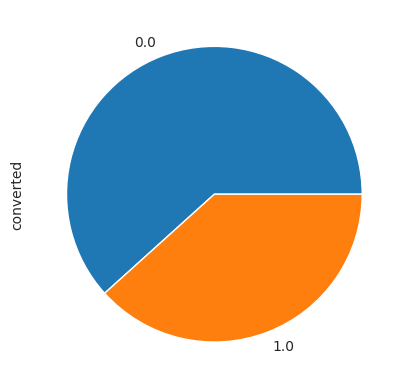

In [326]:
df_train_full.converted.value_counts().plot(kind='pie')



In [327]:
global_mean = df_train_full.converted.mean()
global_mean


0.38311688311688313

In [328]:
df_train_full[categorical].nunique()


lead_origin                                       5
lead_source                                      21
do_not_email                                      2
do_not_call                                       2
last_activity                                    16
country                                          36
specialization                                   19
how_did_you_hear_about_x_education               10
what_is_your_current_occupation                   6
what_matters_most_to_you_in_choosing_a_course     2
search                                            2
magazine                                          1
newspaper_article                                 2
x_education_forums                                1
newspaper                                         2
digital_advertisement                             2
through_recommendations                           2
receive_more_updates_about_our_courses            1
tags                                             26
lead_quality

In [329]:
#!pip install ipython



In [330]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).converted.agg(['mean', 'count'])
    df_group['diff'] = (df_group['mean'] - global_mean)*100
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)




,mean,count,diff,rate
lead_origin,,,,
API,0.308414,2876,-7.470242,0.805014
Landing Page Submission,0.360677,3901,-2.244013,0.941427
Lead Add Form,0.919861,574,53.674374,2.400992
Lead Import,0.225000,40,-15.811688,0.587288
Quick Add Form,1.000000,1,61.688312,2.610169


,mean,count,diff,rate
lead_source,,,,
Click2call,0.750000,4,36.688312,1.957627
Direct Traffic,0.318627,2040,-6.448943,0.831672
Facebook,0.225000,40,-15.811688,0.587288
Google,0.402778,2304,1.966089,1.051318
Live Chat,1.000000,2,61.688312,2.610169
NC_EDM,1.000000,1,61.688312,2.610169
Olark Chat,0.251763,1418,-13.135384,0.657144
Organic Search,0.376356,922,-0.676113,0.982352
Pay per Click Ads,0.000000,1,-38.311688,0.000000


,mean,count,diff,rate
do_not_email,,,,
No,0.401265,6801,1.814764,1.047368
Yes,0.174281,591,-20.883600,0.454903


,mean,count,diff,rate
do_not_call,,,,
No,0.383033,7391,-0.008346,0.999782
Yes,1.000000,1,61.688312,2.610169


,mean,count,diff,rate
last_activity,,,,
Approached upfront,1.000000,8,61.688312,2.610169
Converted to Lead,0.128205,351,-25.491175,0.334637
Email Bounced,0.109434,265,-27.368292,0.285641
Email Link Clicked,0.248848,217,-13.426896,0.649535
Email Marked Spam,1.000000,2,61.688312,2.610169
Email Opened,0.368478,2760,-1.463862,0.961791
Email Received,1.000000,2,61.688312,2.610169
Form Submitted on Website,0.255102,98,-12.801484,0.665860
Had a Phone Conversation,0.727273,22,34.415584,1.898305


,mean,count,diff,rate
country,,,,
Asia/Pacific Region,0.250000,4,-13.311688,0.652542
Australia,0.416667,12,3.354978,1.087571
Bahrain,0.571429,7,18.831169,1.491525
Bangladesh,0.333333,3,-4.978355,0.870056
Belgium,0.000000,2,-38.311688,0.000000
Canada,0.333333,6,-4.978355,0.870056
China,0.000000,1,-38.311688,0.000000
Denmark,1.000000,1,61.688312,2.610169
France,0.666667,6,28.354978,1.740113


,mean,count,diff,rate
specialization,,,,
"Banking, Investment And Insurance",0.398773,326,1.565612,1.040865
Business Administration,0.405685,387,2.256787,1.058906
E-Business,0.362069,58,-2.104792,0.945061
E-COMMERCE,0.317308,104,-6.580919,0.828227
Finance Management,0.406217,933,2.309962,1.060294
Healthcare Management,0.418919,148,3.580204,1.093449
Hospitality Management,0.320000,100,-6.311688,0.835254
Human Resource Management,0.393902,820,1.078556,1.028152
IT Projects Management,0.330484,351,-5.263255,0.862620


,mean,count,diff,rate
how_did_you_hear_about_x_education,,,,
Advertisements,0.343284,67,-3.983330,0.896028
Email,0.375000,24,-0.811688,0.978814
Multiple Sources,0.302469,162,-8.064775,0.789496
Online Search,0.353939,825,-2.917749,0.923842
Other,0.334951,206,-4.816543,0.874280
SMS,0.240000,25,-14.311688,0.626441
Select,0.393541,5326,1.042424,1.027209
Social Media,0.405797,69,2.268022,1.059199
Student of SomeSchool,0.394904,314,1.178758,1.030768


,mean,count,diff,rate
what_is_your_current_occupation,,,,
Businessman,0.250000,12,-13.311688,0.652542
Housewife,0.800000,10,41.688312,2.088136
Other,0.421053,19,3.793575,1.099019
Student,0.315556,225,-6.756133,0.823653
Unemployed,0.346444,6356,-3.667258,0.904278
Working Professional,0.701299,770,31.818182,1.830508


,mean,count,diff,rate
what_matters_most_to_you_in_choosing_a_course,,,,
Better Career Prospects,0.383054,7388,-0.006328,0.999835
Flexibility & Convenience,0.500000,4,11.688312,1.305085


,mean,count,diff,rate
search,,,,
No,0.383146,7381,0.002903,1.000076
Yes,0.363636,11,-1.948052,0.949153


,mean,count,diff,rate
magazine,,,,
No,0.383117,7392,0.0,1.0


,mean,count,diff,rate
newspaper_article,,,,
No,0.383033,7391,-0.008346,0.999782
Yes,1.000000,1,61.688312,2.610169


,mean,count,diff,rate
x_education_forums,,,,
No,0.383117,7392,0.0,1.0


,mean,count,diff,rate
newspaper,,,,
No,0.383169,7391,0.005184,1.000135
Yes,0.000000,1,-38.311688,0.000000


,mean,count,diff,rate
digital_advertisement,,,,
No,0.383221,7390,0.010369,1.000271
Yes,0.000000,2,-38.311688,0.000000


,mean,count,diff,rate
through_recommendations,,,,
No,0.382918,7388,-0.019864,0.999482
Yes,0.750000,4,36.688312,1.957627


,mean,count,diff,rate
receive_more_updates_about_our_courses,,,,
No,0.383117,7392,0.0,1.0


,mean,count,diff,rate
tags,,,,
Already a student,0.113300,609,-26.981639,0.295733
Busy,0.466667,225,8.354978,1.218079
Closed by Horizzon,0.746411,418,36.329460,1.948260
Diploma holder (Not Eligible),0.089744,78,-29.337329,0.234246
Graduation in progress,0.118881,143,-26.423576,0.310300
In confusion whether part time or DLP,0.142857,7,-24.025974,0.372881
Interested in full time MBA,0.075342,146,-30.777442,0.196657
Interested in Next batch,0.714286,7,33.116883,1.864407
Interested in other courses,0.106061,660,-27.705628,0.276836


,mean,count,diff,rate
lead_quality,,,,
High in Relevance,0.582061,1048,19.894419,1.519278
Low in Relevance,0.477674,963,9.455705,1.246810
Might be,0.470861,2591,8.774379,1.229026
Not Sure,0.234861,1767,-14.825554,0.613028
Worst,0.124145,1023,-25.897221,0.324039


,mean,count,diff,rate
update_me_on_supply_chain_content,,,,
No,0.383117,7392,0.0,1.0


,mean,count,diff,rate
get_updates_on_dm_content,,,,
No,0.383117,7392,0.0,1.0


,mean,count,diff,rate
lead_profile,,,,
Dual Specialization Student,0.857143,21,47.402597,2.237288
Lateral Student,0.750000,28,36.688312,1.957627
Other Leads,0.286477,562,-9.664001,0.747753
Potential Lead,0.607524,1781,22.440698,1.585740
Select,0.324936,4724,-5.818039,0.848139
Student of SomeSchool,0.054348,276,-32.876906,0.141857


,mean,count,diff,rate
city,,,,
Mumbai,0.354785,3030,-2.833140,0.926050
Other Cities,0.360182,658,-2.293451,0.940137
Other Cities of Maharashtra,0.374713,435,-0.840424,0.978064
Other Metro Cities,0.373219,351,-0.989751,0.974166
Select,0.433848,2139,5.073071,1.132416
Thane & Outskirts,0.388811,715,0.569431,1.014863
Tier II Cities,0.312500,64,-7.061688,0.815678


,mean,count,diff,rate
asymmetrique_activity_index,,,,
01.High,0.355178,1236,-2.793889,0.927075
02.Medium,0.404308,5617,2.119147,1.055313
03.Low,0.226345,539,-15.677180,0.590799


,mean,count,diff,rate
asymmetrique_profile_index,,,,
01.High,0.437500,3264,5.438312,1.141949
02.Medium,0.340201,4077,-4.291575,0.887983
03.Low,0.333333,51,-4.978355,0.870056


,mean,count,diff,rate
i_agree_to_pay_the_amount_through_cheque,,,,
No,0.383117,7392,0.0,1.0


,mean,count,diff,rate
a_free_copy_of_mastering_the_interview,,,,
No,0.39578,5071,1.266304,1.033053
Yes,0.35545,2321,-2.766665,0.927785


,mean,count,diff,rate
last_notable_activity,,,,
Approached upfront,1.000000,1,61.688312,2.610169
Email Bounced,0.160000,50,-22.311688,0.417627
Email Link Clicked,0.222222,135,-16.089466,0.580038
Email Marked Spam,1.000000,2,61.688312,2.610169
Email Opened,0.364362,2256,-1.875518,0.951046
Email Received,1.000000,1,61.688312,2.610169
Form Submitted on Website,0.000000,1,-38.311688,0.000000
Had a Phone Conversation,0.900000,10,51.688312,2.349153
Modified,0.230430,2721,-15.268689,0.601461


In [331]:
df.drop(columns=['do_not_call', 'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview'], axis=1, inplace=True)


In [332]:
categorical = list(df.select_dtypes(include='object').columns)
discrete = list(df.select_dtypes(exclude='object').columns)

In [333]:
categorical

['lead_origin',
 'lead_source',
 'do_not_email',
 'last_activity',
 'country',
 'specialization',
 'how_did_you_hear_about_x_education',
 'what_is_your_current_occupation',
 'tags',
 'lead_quality',
 'lead_profile',
 'city',
 'asymmetrique_activity_index',
 'asymmetrique_profile_index',
 'last_notable_activity']

In [334]:
discrete

['lead_number',
 'converted',
 'totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit',
 'asymmetrique_activity_score',
 'asymmetrique_profile_score']

In [335]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.converted)


In [336]:
df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

df_mi*100

,MI
tags,20.529019
last_activity,8.442903
last_notable_activity,7.251663
lead_source,6.163487
lead_origin,5.559875
lead_quality,5.447429
lead_profile,4.450841
what_is_your_current_occupation,2.494650
do_not_email,0.891099
asymmetrique_activity_index,0.508452


In [337]:
#correlation matrix of the numrical data
discrete.pop(1)
df_train_full[discrete].corrwith(df_train_full.converted)*100



lead_number                     2.190375
totalvisits                     3.304059
total_time_spent_on_website    36.347010
page_views_per_visit           -0.118611
asymmetrique_activity_score     9.112484
asymmetrique_profile_score     12.175046
dtype: float64

In [338]:
for col in categorical:
    df_group = df.groupby(by=col).converted.agg(['mean', 'count'])
    df_group['diff'] = (df_group['mean'] - global_mean)*100
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)


,mean,count,diff,rate
lead_origin,,,,
API,0.311453,3580,-7.166437,0.812944
Landing Page Submission,0.361850,4886,-2.126670,0.944490
Lead Add Form,0.924791,718,54.167420,2.413861
Lead Import,0.236364,55,-14.675325,0.616949
Quick Add Form,1.000000,1,61.688312,2.610169


,mean,count,diff,rate
lead_source,,,,
Click2call,0.750000,4,36.688312,1.957627
Direct Traffic,0.323137,2550,-5.997963,0.843443
Facebook,0.236364,55,-14.675325,0.616949
Google,0.402151,2882,1.903440,1.049683
Live Chat,1.000000,2,61.688312,2.610169
NC_EDM,1.000000,1,61.688312,2.610169
Olark Chat,0.255259,1759,-12.785821,0.666268
Organic Search,0.381034,1160,-0.208240,0.994565
Pay per Click Ads,0.000000,1,-38.311688,0.000000


,mean,count,diff,rate
do_not_email,,,,
No,0.404773,8506,2.165622,1.056526
Yes,0.160763,734,-22.235394,0.419619


,mean,count,diff,rate
last_activity,,,,
Approached upfront,1.000000,9,61.688312,2.610169
Converted to Lead,0.131640,433,-25.147716,0.343602
Email Bounced,0.093656,331,-28.946129,0.244457
Email Link Clicked,0.280443,271,-10.267408,0.732003
Email Marked Spam,1.000000,2,61.688312,2.610169
Email Opened,0.369784,3475,-1.333271,0.965199
Email Received,1.000000,2,61.688312,2.610169
Form Submitted on Website,0.241379,116,-14.173757,0.630041
Had a Phone Conversation,0.733333,30,35.021645,1.914124


,mean,count,diff,rate
country,,,,
Asia/Pacific Region,0.250000,4,-13.311688,0.652542
Australia,0.388889,18,0.577201,1.015066
Bahrain,0.500000,8,11.688312,1.305085
Bangladesh,0.333333,3,-4.978355,0.870056
Belgium,0.000000,2,-38.311688,0.000000
Canada,0.333333,6,-4.978355,0.870056
China,0.000000,2,-38.311688,0.000000
Denmark,1.000000,1,61.688312,2.610169
France,0.571429,7,18.831169,1.491525


,mean,count,diff,rate
specialization,,,,
"Banking, Investment And Insurance",0.433014,418,4.989747,1.130241
Business Administration,0.390086,464,0.696932,1.018191
E-Business,0.323529,68,-5.958747,0.844467
E-COMMERCE,0.315789,133,-6.732741,0.824264
Finance Management,0.398601,1144,1.548452,1.040417
Healthcare Management,0.428571,189,4.545455,1.118644
Hospitality Management,0.363636,132,-1.948052,0.949153
Human Resource Management,0.396059,1015,1.294223,1.033781
IT Projects Management,0.336364,440,-4.675325,0.877966


,mean,count,diff,rate
how_did_you_hear_about_x_education,,,,
Advertisements,0.365591,93,-1.752549,0.954256
Email,0.468750,32,8.563312,1.223517
Multiple Sources,0.318182,198,-6.493506,0.830508
Online Search,0.351764,1049,-3.135330,0.918163
Other,0.318725,251,-6.439178,0.831927
SMS,0.233333,30,-14.978355,0.609040
Select,0.397710,6638,1.459327,1.038091
Social Media,0.376471,85,-0.664629,0.982652
Student of SomeSchool,0.380000,400,-0.311688,0.991864


,mean,count,diff,rate
what_is_your_current_occupation,,,,
Businessman,0.357143,14,-2.597403,0.932203
Housewife,0.833333,12,45.021645,2.175141
Other,0.458333,24,7.521645,1.196328
Student,0.321555,283,-6.156211,0.839312
Unemployed,0.348242,7937,-3.487447,0.908972
Working Professional,0.701031,970,31.791404,1.829810


,mean,count,diff,rate
tags,,,,
Already a student,0.111709,743,-27.140760,0.291580
Busy,0.457565,271,7.444769,1.194321
Closed by Horizzon,0.737037,540,35.392015,1.923792
Diploma holder (Not Eligible),0.101010,99,-28.210678,0.263653
Graduation in progress,0.111111,171,-27.200577,0.290019
In confusion whether part time or DLP,0.111111,9,-27.200577,0.290019
Interested in full time MBA,0.104167,192,-27.895022,0.271893
Interested in Next batch,0.750000,8,36.688312,1.957627
Interested in other courses,0.107448,819,-27.566878,0.280458


,mean,count,diff,rate
lead_quality,,,,
High in Relevance,0.576347,1336,19.323042,1.504364
Low in Relevance,0.488183,1227,10.506568,1.274239
Might be,0.470497,3237,8.738049,1.228078
Not Sure,0.231996,2194,-15.112053,0.605550
Worst,0.128411,1246,-25.470597,0.335174


,mean,count,diff,rate
lead_profile,,,,
Dual Specialization Student,0.846154,26,46.303696,2.208605
Lateral Student,0.750000,32,36.688312,1.957627
Other Leads,0.294630,689,-8.848698,0.769034
Potential Lead,0.602570,2257,21.945290,1.572809
Select,0.326731,5907,-5.638589,0.852823
Student of SomeSchool,0.066869,329,-31.624758,0.174540


,mean,count,diff,rate
city,,,,
Mumbai,0.358630,3795,-2.448711,0.936085
Other Cities,0.358100,821,-2.501700,0.934701
Other Cities of Maharashtra,0.381387,548,-0.173002,0.995484
Other Metro Cities,0.375286,437,-0.783084,0.979560
Select,0.434913,2658,5.179659,1.135198
Thane & Outskirts,0.391304,897,0.818746,1.021371
Tier II Cities,0.309524,84,-7.359307,0.807910


,mean,count,diff,rate
asymmetrique_activity_index,,,,
01.High,0.348989,1533,-3.412797,0.910920
02.Medium,0.407854,7054,2.473682,1.064567
03.Low,0.228178,653,-15.493924,0.595582


,mean,count,diff,rate
asymmetrique_profile_index,,,,
01.High,0.435306,4073,5.218879,1.136222
02.Medium,0.345739,5105,-3.737741,0.902439
03.Low,0.370968,62,-1.214914,0.968289


,mean,count,diff,rate
last_notable_activity,,,,
Approached upfront,1.000000,1,61.688312,2.610169
Email Bounced,0.150000,60,-23.311688,0.391525
Email Link Clicked,0.260116,173,-12.300128,0.678946
Email Marked Spam,1.000000,2,61.688312,2.610169
Email Opened,0.369296,2827,-1.382081,0.963925
Email Received,1.000000,1,61.688312,2.610169
Form Submitted on Website,0.000000,1,-38.311688,0.000000
Had a Phone Conversation,0.928571,14,54.545455,2.423729
Modified,0.229821,3407,-15.329593,0.599872


In [339]:
# set up the encoder
from feature_engine.encoding import RareLabelEncoder
encoder = RareLabelEncoder(tol=0.05, n_categories=3, variables=categorical,
                           replace_with='Rare')

# fit the encoder
encoder.fit(df_train)

RareLabelEncoder(n_categories=3,
                 variables=['lead_origin', 'lead_source', 'do_not_email',
                            'last_activity', 'country', 'specialization',
                            'how_did_you_hear_about_x_education',
                            'what_is_your_current_occupation', 'tags',
                            'lead_quality', 'lead_profile', 'city',
                            'asymmetrique_activity_index',
                            'asymmetrique_profile_index',
                            'last_notable_activity'])

In [340]:
encoder.encoder_dict_

{'lead_origin': ['Landing Page Submission', 'API', 'Lead Add Form'],
 'lead_source': ['Google',
  'Direct Traffic',
  'Olark Chat',
  'Organic Search',
  'Reference'],
 'do_not_email': ['No', 'Yes'],
 'last_activity': ['Email Opened',
  'SMS Sent',
  'Olark Chat Conversation',
  'Page Visited on Website'],
 'country': ['India'],
 'specialization': ['Select',
  'Finance Management',
  'Human Resource Management',
  'Marketing Management',
  'Operations Management',
  'Business Administration'],
 'how_did_you_hear_about_x_education': ['Select',
  'Online Search',
  'Word Of Mouth'],
 'what_is_your_current_occupation': ['Unemployed', 'Working Professional'],
 'tags': ['Will revert after reading the email',
  'Ringing',
  'Interested in other courses',
  'Already a student',
  'Closed by Horizzon'],
 'lead_quality': ['Might be',
  'Not Sure',
  'High in Relevance',
  'Worst',
  'Low in Relevance'],
 'lead_profile': ['Select', 'Potential Lead', 'Other Leads'],
 'city': ['Mumbai',
  'Select'

In [341]:
df.shape

(9240, 22)

In [342]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.converted.values
y_val = df_val.converted.values

del df_train['converted']
del df_val['converted']

In [343]:
# build the pipeline

income_pipe = Pipeline([

    # === rare label encoding =========
    ('rare_label_enc', ce.RareLabelEncoder(tol=0.05, n_categories=2)),

    # === encoding categories ===
    ('categorical_enc', ce.DecisionTreeEncoder(regression=False,
        param_grid={'max_depth': [1, 2,3]},
        random_state=2909,
        variables=categorical)),

    # === discretisation =====
    ('discretisation', dsc.DecisionTreeDiscretiser(regression=False,
        param_grid={'max_depth': [1, 2, 3]},
        random_state=2909,
        variables=discrete)),

    # classification
    ('gbm', GradientBoostingClassifier(random_state=42))
])

In [344]:
income_pipe.fit(df_train, y_train)

Pipeline(steps=[('rare_label_enc', RareLabelEncoder(n_categories=2)),
                ('categorical_enc',
                 DecisionTreeEncoder(param_grid={'max_depth': [1, 2, 3]},
                                     random_state=2909, regression=False,
                                     variables=['lead_origin', 'lead_source',
                                                'do_not_email', 'last_activity',
                                                'country', 'specialization',
                                                'how_did_you_hear_about_x_education',
                                                'what_is_your_current_occupation',
                                                'tags',...
                                                'asymmetrique_profile_index',
                                                'last_notable_activity'])),
                ('discretisation',
                 DecisionTreeDiscretiser(param_grid={'max_depth': [1, 2, 3]},
                                         random_state=2909, regression=False,
                                         variables=['lead_number',
                                                    'totalvisits',
                                                    'total_time_spent_on_website',
                                                    'page_views_per_visit',
                                                    'asymmetrique_activity_score',
                                                    'asymmetrique_profile_score'])),
                ('gbm', GradientBoostingClassifier(random_state=42))])

In [345]:
# extract predictions

X_train_preds = income_pipe.predict(df_train)
X_val_preds = income_pipe.predict(df_val)

In [346]:
# show model performance:

print('train accuracy: {}'.format(accuracy_score(y_train, X_train_preds)))
print()
print('test accuracy: {}'.format(accuracy_score(y_val, X_val_preds)))

train accuracy: 0.8933764135702746

test accuracy: 0.8815573770491804


In [347]:
y_test = df_test.converted.values


del df_test['converted']

In [348]:
X_test_preds = income_pipe.predict(df_test)
print('test accuracy: {}'.format(accuracy_score(y_test, X_test_preds)))

test accuracy: 0.8809523809523809


In [349]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, X_test_preds))
print('F1 score:', f1_score(y_test, X_test_preds))
print('Recall:', recall_score(y_test, X_test_preds))
print('Precision:', precision_score(y_test, X_test_preds))
print('\n clasification report:\n', classification_report(y_test,X_test_preds))
print('\n confussion matrix:\n',confusion_matrix(y_test, X_test_preds))


Accuracy: 0.8809523809523809
F1 score: 0.844851904090268
Recall: 0.821673525377229
Precision: 0.8693759071117562

 clasification report:
               precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      1119
         1.0       0.87      0.82      0.84       729

    accuracy                           0.88      1848
   macro avg       0.88      0.87      0.87      1848
weighted avg       0.88      0.88      0.88      1848


 confussion matrix:
 [[1029   90]
 [ 130  599]]


In [350]:
df_train[discrete].head()

,lead_number,totalvisits,total_time_spent_on_website,page_views_per_visit,asymmetrique_activity_score,asymmetrique_profile_score
5575,607172.0,0.0,0.0,0.0,13.0,20.0
7142,594698.0,2.0,1103.0,2.0,13.0,19.0
857,651431.0,5.0,1326.0,5.0,14.0,17.0
3398,627632.0,3.0,31.0,3.0,13.0,13.0
8995,581400.0,6.0,1048.0,3.0,15.0,20.0


In [351]:
train_dict = df_train[categorical + discrete].to_dict(orient='records')


In [352]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)

In [353]:
X_train[0]

array([0.00000e+00, 1.00000e+00, 0.00000e+00, 1.30000e+01, 0.00000e+00,
       1.00000e+00, 0.00000e+00, 2.00000e+01, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.000

In [354]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [355]:
val_dict = df_val[categorical + discrete].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [356]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.75100901, 0.24899099],
       [0.29655433, 0.70344567],
       [0.51858564, 0.48141436],
       ...,
       [0.42029581, 0.57970419],
       [0.59936336, 0.40063664],
       [0.6702112 , 0.3297888 ]])

In [357]:
y_pred = y_pred[:, 1]
y_pred


array([0.24899099, 0.70344567, 0.48141436, ..., 0.57970419, 0.40063664,
       0.3297888 ])

In [358]:
conversion_decision = (y_pred >= 0.5)
conversion_decision.mean()


0.2754098360655738

In [359]:
reduced_categorical = ['tags','last_activity',	'last_notable_activity','lead_source','lead_origin','lead_quality','lead_profile','what_is_your_current_occupation']

In [360]:
train_dict = df_train[reduced_categorical + discrete].to_dict(orient='records')


In [361]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)

In [362]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)


LogisticRegression(random_state=1, solver='liblinear')

In [363]:
val_dict = df_val[reduced_categorical + discrete].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [139]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.75100714, 0.24899286],
       [0.29655965, 0.70344035],
       [0.51858599, 0.48141401],
       ...,
       [0.42029826, 0.57970174],
       [0.59936235, 0.40063765],
       [0.67020996, 0.32979004]])

In [369]:
y_pred = (y_pred >= 0.5)
y_pred.mean()

0.2754098360655738

In [370]:
print('Accuracy:', accuracy_score(y_val, y_pred))
print('F1 score:', f1_score(y_val, y_pred))
print('Recall:', recall_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred))
print('\n clasification report:\n', classification_report(y_val,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_val, y_pred))

Accuracy: 0.7245901639344262
F1 score: 0.5831265508684863
Recall: 0.5
Precision: 0.6994047619047619

 clasification report:
               precision    recall  f1-score   support

         0.0       0.73      0.87      0.79      1500
         1.0       0.70      0.50      0.58       940

    accuracy                           0.72      2440
   macro avg       0.72      0.68      0.69      2440
weighted avg       0.72      0.72      0.71      2440


 confussion matrix:
 [[1298  202]
 [ 470  470]]
